# Week 5 Assignment
## Segmenting and Clustering Neighborhoods in Greenville Anderson

#### First, use pandas to scrape the CSV at the URL to a pandas data frame.

In [98]:
import pandas as pd
import numpy as np

# download raw table from web
# www.downloadexcelfiles.com
#https://www.downloadexcelfiles.com/us_en/download-list-zip-codes-south-carolina-state
# used local file in case I was not online.
url='usa_zipcode_of_sc-test.csv'
df_SC_raw = pd.read_csv(url, index_col=False)
#make a copy to clean (this will help later if we need to test or validate)
df_SC_clean = df_SC_raw.copy(deep=True)
df_SC_clean.drop(df_SC_clean.tail(1).index, inplace = True)
df_SC_clean['zip'] = pd.to_numeric(df_SC_clean['zip'])

  

In [101]:
df_SC_clean.head()

,zip,Zipcode name,City,State,County Name
10,29621.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
11,29622.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
12,29623.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
13,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
14,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON


Looks like we have the list !
Now clean for Greenville and Anderson. 

In [102]:
# get everything that isn't Greenville or Anderson County
df_SC_clean_subset = df_SC_clean[(df_SC_raw.iloc[:, 4] == "GREENVILLE") | (df_SC_clean.iloc[:, 4] == "ANDERSON") ]
df_SC_clean_subset.head()

<ipython-input-102-b7e1e5f48872>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_SC_clean_subset = df_SC_clean[(df_SC_raw.iloc[:, 4] == "GREENVILLE") | (df_SC_clean.iloc[:, 4] == "ANDERSON") ]


,zip,Zipcode name,City,State,County Name
10,29621.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
11,29622.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
12,29623.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
13,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON
14,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON


In [103]:
#check raw frame
df_SC_raw.shape

(520, 5)

In [104]:
#check raw frame
df_SC_clean.shape

(48, 5)

#### Only 48 zip codes remain

In [105]:
url='us-zip-code-latitude-and-longitude.csv'
df_SC_geo = pd.read_csv(url, index_col=False)
#check the results
df_SC_geo.rename(columns = {'Zip':'zip'}, inplace = True)
df_SC_geo.head()

,zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,55795,Willow River,MN,46.317812,-92.84315,-6,1,46.317812
1,45388,Yorkshire,OH,40.328535,-84.47938,-5,1,40.328535
2,39483,Foxworth,MS,31.218509,-89.90761,-6,1,31.218509
3,31503,Waycross,GA,31.205194,-82.37534,-5,1,31.205194
4,45833,Delphos,OH,40.841409,-84.34178,-5,1,40.841409


#### We now have two data frames- one containing the geospatial data, and one containing the names. 
#### We want to do what is called an "inner" or natural join.

In [301]:
df_SC_join1 = pd.merge(df_SC_clean, df_SC_geo, on='zip', how='inner', suffixes=('', '_drop'))
df_SC_join1['Neighbourhood'] = df_SC_join1['City_drop']
df_SC_join1.drop([col for col in df_SC_join1.columns if 'drop' in col], axis=1, inplace=True)
df_SC_join1.head()

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood
0,29621.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.523657,-82.625090,-5,1,34.523657,Anderson
1,29622.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.491988,-82.782868,-5,1,34.491988,Anderson
2,29623.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.438087,-82.835449,-5,1,34.438087,Anderson
3,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.645500,-5,1,34.478139,Anderson
4,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.716150,-5,1,34.532638,Anderson


#### Lets check the shape again.

In [110]:
df_SC_join1.shape

(48, 12)

#### We want to attempt to combine foursquare with other public facing geolocated data.
#### This data was archived (scraped) separately, and then combined into a single text file (using Mac Automator- other tools will also work.
#### The cells below show how to extract property value and crime data from the archived and combined web pages.

In [562]:
#crime data
import pandas as pd
import numpy as np
#from itertools import isclice
import re as re

j = 0
list_zip_code = []
list_property_crime = []
list_violent_crime = []

with open ('crime.rtf', 'rt') as myfilecopy:
    all_lines = myfilecopy.readlines()
with open ('crime.rtf', 'rt') as myfile:
    for i, myline in enumerate(myfile):
        #print(myline)
        splitline = np.array(re.split(r"\s+", myline))
        #print(splitline)
       
        if "ranked" in splitline:
            #print(splitline)
            zipcode = splitline[16]
            if splitline[16] == "(zip":
               zipcode = splitline[17]
            list_zip_code.append(zipcode[0:5])
            vcrime = (splitline[20])
            if vcrime == "is":
                vcrime = (splitline[21])
            list_violent_crime.append(vcrime[:4])
            pcrime = (splitline[31])
            if pcrime == "crime":
                pcrime = (splitline[33])
            list_property_crime.append(pcrime[:4])
            #print(splitline)
 
df_bestplaces = pd.DataFrame()
df_bestplaces['zip'] = list_zip_code
df_bestplaces['violentcrime'] = list_violent_crime
df_bestplaces['propertycrime'] = list_property_crime
df_bestplaces.head()

,zip,violentcrime,propertycrime
0,29662,29.9,37.1
1,29683,49.1,56.1
2,29690,23.2,38.6
3,29644,25.3,30.6
4,29680,20.4,29.5


In [704]:
#property data
j = 0
list_zip_code = []
list_property_value = []

with open ('zip.rtf', 'rt') as myfilecopy:
    all_lines = myfilecopy.readlines()
with open ('zip.rtf', 'rt') as myfile:
    propvaltotal = 0.0
    propertycount = 0
    for i, myline in enumerate(myfile):
        #print(myline)
        splitline = np.array(re.split(r"\s+", myline))
        if "Best" in splitline:
            if "Live" in splitline:
                zipcode = splitline[8]
                if zipcode == "(zip":
                    zipcode = splitline[9]
                list_zip_code.append(zipcode[:5])
                
        if "median" in splitline:
             if "price" in splitline:
                #print(splitline)
                length = len(splitline)
                propval = splitline[length - 3]
                start = propval.find("<u>")
                start = start + 4
                stop = propval.find("</a>")
                stop = stop - 4
                propvaltext = propval[start:stop]
                propvaltext = propvaltext.replace(',', '')
                propvaltotal = propvaltotal + float(propvaltext)
                propertycount = propertycount + 1
                list_property_value.append(propvaltext)
averageprice = propvaltotal / propertycount
df_bestplaces2 = pd.DataFrame()
df_bestplaces2['zip'] = list_zip_code
df_bestplaces2['list_property_value'] = list_property_value
print(averageprice)
df_bestplaces2.head()

161687.5


,zip,list_property_value
0,29662,174400
1,29683,91500
2,29690,191900
3,29680,199700
4,29681,241400


In [550]:
df_bestplaces2['zip'] = pd.to_numeric(df_bestplaces2['zip'])
                                      
df_SC_join2 = pd.merge(df_SC_join1, df_bestplaces2, on='zip', how='inner', suffixes=('', '_drop'))
                                      
df_SC_join2.drop([col for col in df_SC_join1.columns if 'drop' in col], axis=1, inplace=True)
df_SC_join2.head()

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value
0,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,67100
1,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,144700
2,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,140700
3,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,126100
4,29635.0,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,206600


In [551]:
df_bestplaces['zip'] = pd.to_numeric(df_bestplaces['zip'])
df_SC_join3 = pd.merge(df_SC_join1, df_bestplaces, on='zip', how='inner', suffixes=('', '_drop'))
df_SC_join3.drop([col for col in df_SC_join1.columns if 'drop' in col], axis=1, inplace=True)
df_SC_join3.head()

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,violentcrime,propertycrime
0,29621.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.523657,-82.62509,-5,1,34.523657,Anderson,33.8,47.1
1,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,66.2,79.2
2,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,38.6,47.7
3,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,39.4,47.6
4,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,37.5,49.1


In [588]:
df_SC_join4 = pd.merge(df_SC_join2, df_SC_join3, on='zip', how='inner', suffixes=('', '_drop'))
df_SC_join4.drop([col for col in df_SC_join1.columns if 'drop' in col], axis=1, inplace=True)
df_SC_join4.head()

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime
0,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,67100,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,66.2,79.2
1,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,144700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,38.6,47.7
2,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,140700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,39.4,47.6
3,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,126100,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,37.5,49.1
4,29635.0,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,206600,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,22.5,36.4


#### It appears the join was successfull (based on size of databases we will lose some rows).
#### Additional validation could include spot checking, or fully checking the results.  We will assume it is accurate.
#### Now we will use Foursquare
#### First we get everything installed.

In [308]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip3 install geopy # make sure geopy is installed
!pip3 install sklearn # make sure sklearn is installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [122]:
CLIENT_ID = 'BYOSIQN4QCKGKU51ZWS5AAGF52NDQEQ0BHKKUA5RJOWZ5REF' # your Foursquare ID
CLIENT_SECRET = 'G1ZT3RXN4IHTL2HZWYC1QO5ZKGIW0PR450LZCELI3X2HWZSK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BYOSIQN4QCKGKU51ZWS5AAGF52NDQEQ0BHKKUA5RJOWZ5REF
CLIENT_SECRET:G1ZT3RXN4IHTL2HZWYC1QO5ZKGIW0PR450LZCELI3X2HWZSK


#### Make a frame of the Greenville and ANDERSON Neighborhoods.

In [589]:
Green_data = df_SC_join4
#[df_SC_join4['County Name_y'].str.contains('GREENVILLE')].reset_index(drop=True)
Green_data.head(10)

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime
0,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,67100,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,66.2,79.2
1,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,144700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,38.6,47.7
2,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,140700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,39.4,47.6
3,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,126100,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,37.5,49.1
4,29635.0,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,206600,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,22.5,36.4
5,29644.0,"FOUNTAIN INN, SC",FOUNTAIN INN,SC,GREENVILLE,34.681279,-82.19732,-5,1,34.681279,Fountain Inn,170500,"FOUNTAIN INN, SC",FOUNTAIN INN,SC,GREENVILLE,34.681279,-82.19732,-5,1,34.681279,Fountain Inn,25.3,30.6
6,29601.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.848301,-82.40578,-5,1,34.848301,Greenville,254100,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.848301,-82.40578,-5,1,34.848301,Greenville,55.8,65.8
7,29605.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.798035,-82.39289,-5,1,34.798035,Greenville,160800,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.798035,-82.39289,-5,1,34.798035,Greenville,45.2,54.3
8,29607.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.825592,-82.34099,-5,1,34.825592,Greenville,222100,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.825592,-82.34099,-5,1,34.825592,Greenville,40.9,50.7
9,29609.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.889217,-82.39364,-5,1,34.889217,Greenville,208700,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.889217,-82.39364,-5,1,34.889217,Greenville,42.2,51.3


In [ ]:
#### Get lattitude and longitude for Greenville

In [590]:
address = 'Greenville, SC'

geolocator = Nominatim(user_agent="ON_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Greenville are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Greenville are 34.851354, -82.3984882.


In [591]:
# create map of Greenville using latitude and longitude values
map_Greenville = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(Green_data['Latitude'], Green_data['Longitude'], Green_data['County Name'], Green_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Greenville)  
    
map_Greenville

#### Use the same function as in the previous lab to get nearby venues.

In [572]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now call the function for Greenville Anderson

In [592]:
# now run Greenville
Green_venues = getNearbyVenues(names=Green_data['Neighbourhood'],
                                   latitudes=Green_data['Latitude'],
                                   longitudes=Green_data['Longitude']
                                  )

Anderson
Anderson
Anderson
Belton
Cleveland
Fountain Inn
Greenville
Greenville
Greenville
Greenville
Greenville
Greenville
Greenville
Greenville
Greer
Greer
Honea Path
Iva
Marietta
Mauldin
Pelzer
Pendleton
Piedmont
Simpsonville
Simpsonville
Slater
Starr
Taylors
Townville
Travelers Rest
Williamston


#### Appears to have worked. 

In [593]:
print(Green_venues.shape)
Green_venues.head()

(132, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anderson,34.478139,-82.6455,CoachHouse Restaurant,34.481048,-82.645070,American Restaurant
1,Anderson,34.478139,-82.6455,Little Caesars Pizza,34.479441,-82.647617,Pizza Place
2,Anderson,34.478139,-82.6455,fred's Super Dollar,34.479836,-82.647072,Discount Store
3,Anderson,34.478139,-82.6455,Subway,34.479989,-82.648702,Sandwich Place
4,Anderson,34.478139,-82.6455,TD Bank,34.477879,-82.649338,Bank


#### Lets check closer.

In [594]:
Green_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Anderson,12,12,12,12,12,12
Belton,9,9,9,9,9,9
Cleveland,2,2,2,2,2,2
Fountain Inn,2,2,2,2,2,2
Greenville,81,81,81,81,81,81
Greer,11,11,11,11,11,11
Honea Path,4,4,4,4,4,4
Mauldin,5,5,5,5,5,5
Pendleton,1,1,1,1,1,1


In [595]:
print('There are {} unique categories.'.format(len(Green_venues['Venue Category'].unique())))

There are 77 unique categories.


#### Analyze each neighborhood.

In [596]:
# one hot encoding
Green_onehot = pd.get_dummies(Green_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Green_onehot['Neighbourhood'] = Green_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Green_onehot.columns[-1]] + list(Green_onehot.columns[:-1])
Green_onehot = Green_onehot[fixed_columns]

Green_onehot.head()

,Neighbourhood,ATM,American Restaurant,Art Gallery,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Bike Shop,Bookstore,Brewery,Business Service,Café,Campground,Caribbean Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Service,Fried Chicken Joint,Frozen Yogurt Shop,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Jazz Club,Juice Bar,Lingerie Store,Lounge,Mexican Restaurant,Mobile Phone Shop,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Soup Place,Steakhouse,Supermarket,Supplement Shop,Tapas Restaurant,Tea Room,Theater,Thrift / Vintage Store,Trail,Video Store
0,Anderson,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Anderson,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [597]:
Green_onehot.shape

(132, 78)

In [598]:
Green_grouped = Green_onehot.groupby('Neighbourhood').mean().reset_index()
Green_grouped

,Neighbourhood,ATM,American Restaurant,Art Gallery,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Bike Shop,Bookstore,Brewery,Business Service,Café,Campground,Caribbean Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Service,Fried Chicken Joint,Frozen Yogurt Shop,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Jazz Club,Juice Bar,Lingerie Store,Lounge,Mexican Restaurant,Mobile Phone Shop,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Soup Place,Steakhouse,Supermarket,Supplement Shop,Tapas Restaurant,Tea Room,Theater,Thrift / Vintage Store,Trail,Video Store
0,Anderson,0.000000,0.166667,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.083333,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Belton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.333333,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111
2,Cleveland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Fountain Inn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Greenville,0.012346,0.049383,0.037037,0.012346,0.024691,0.000000,0.024691,0.012346,0.012346,0.024691,0.000000,0.012346,0.012346,0.0,0.012346,0.024691,0.012346,0.024691,0.012346,0.024691,0.012346,0.012346,0.012346,0.024691,0.012346,0.000000,0.000000,0.012346,0.012346,0.012346,0.012346,0.000000,0.012346,0.012346,0.012346,0.0

In [599]:
Green_grouped.shape

(13, 78)

#### Print top venues.

In [600]:
num_top_venues = 5

for hood in Green_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Green_grouped[Green_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')#### Print top venues.

----Anderson----
                  venue  freq
0           Pizza Place  0.17
1   American Restaurant  0.17
2  Fast Food Restaurant  0.17
3        Discount Store  0.17
4            Shoe Store  0.08


----Belton----
                  venue  freq
0  Fast Food Restaurant  0.33
1           Video Store  0.11
2         Shopping Mall  0.11
3        Discount Store  0.11
4     Mobile Phone Shop  0.11


----Cleveland----
            venue  freq
0  Scenic Lookout   0.5
1      Campground   0.5
2             ATM   0.0
3     Pizza Place   0.0
4       Pet Store   0.0


----Fountain Inn----
                   venue  freq
0    Fried Chicken Joint   0.5
1   Fast Food Restaurant   0.5
2                    ATM   0.0
3              Pet Store   0.0
4  Performing Arts Venue   0.0


----Greenville----
                 venue  freq
0  American Restaurant  0.05
1                Hotel  0.04
2           Steakhouse  0.04
3          Pizza Place  0.04
4           Restaurant  0.04


----Greer----
                  venu

#### Print top 

In [601]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [622]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Green_grouped['Neighbourhood']

for ind in np.arange(Green_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Green_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderson,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
1,Belton,Fast Food Restaurant,Video Store,Shopping Mall,Fried Chicken Joint,Mobile Phone Shop,Discount Store,Pharmacy,Bar,Deli / Bodega,Gym / Fitness Center
2,Cleveland,Campground,Scenic Lookout,Video Store,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant
3,Fountain Inn,Fried Chicken Joint,Fast Food Restaurant,Video Store,Food & Drink Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant
4,Greenville,American Restaurant,Hotel,Steakhouse,Pizza Place,Restaurant,Trail,Art Gallery,Bar,Clothing Store,Performing Arts Venue


#### Run K means clustering 

In [623]:
# set number of clusters
kclusters = 6

Green_grouped_clustering = Green_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Green_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 5, 0, 0, 0, 0, 0, 4, 3], dtype=int32)

In [624]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Green_merged = Green_data

#Green_data.dtypes

# merge Green_grouped with Green_data to add latitude/longitude for each neighborhood
Green_merged = Green_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

#Green_merged["Cluster Labels"]= int(Green_merged["Cluster Labels"])
Green_merged.head() # check the last columns!

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,67100,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,66.2,79.2,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
1,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,144700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,38.6,47.7,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
2,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,140700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,39.4,47.6,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
3,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,126100,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,37.5,49.1,0.0,Fast Food Restaurant,Video Store,Shopping Mall,Fried Chicken Joint,Mobile Phone Shop,Discount Store,Pharmacy,Bar,Deli / Bodega,Gym / Fitness Center
4,29635.0,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,206600,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,22.5,36.4,5.0,Campground,Scenic Lookout,Video Store,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant


In [625]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Green_merged_clean = Green_merged.dropna()

#Green_merged_clean['Cluster Labels'] = pd.to_int(Green_merged_clean['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Green_merged_clean['Latitude'], Green_merged_clean['Longitude'], Green_merged_clean['Neighbourhood'], Green_merged_clean['Cluster Labels']):
    clusterint = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(clusterint), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[clusterint-1],
        fill=True,
        fill_color=rainbow[clusterint-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [627]:
Green_merged_clean.head(15)

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.645500,-5,1,34.478139,Anderson,67100,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.645500,-5,1,34.478139,Anderson,66.2,79.2,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
1,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.716150,-5,1,34.532638,Anderson,144700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.716150,-5,1,34.532638,Anderson,38.6,47.7,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
2,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.740320,-5,1,34.464572,Anderson,140700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.740320,-5,1,34.464572,Anderson,39.4,47.6,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Discount Store,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Deli / Bodega,Department Store
3,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.490530,-5,1,34.517231,Belton,126100,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.490530,-5,1,34.517231,Belton,37.5,49.1,0.0,Fast Food Restaurant,Video Store,Shopping Mall,Fried Chicken Joint,Mobile Phone Shop,Discount Store,Pharmacy,Bar,Deli / Bodega,Gym / Fitness Center
4,29635.0,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.625650,-5,1,35.084282,Cleveland,206600,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.625650,-5,1,35.084282,Cleveland,22.5,36.4,5.0,Campground,Scenic Lookout,Video Store,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant
5,29644.0,"FOUNTAIN INN, SC",FOUNTAIN INN,SC,GREENVILLE,34.681279,-82.197320,-5,1,34.681279,Fountain Inn,170500,"FOUNTAIN INN, SC",FOUNTAIN INN,SC,GREENVILLE,34.681279,-82.197320,-5,1,34.681279,Fountain Inn,25.3,30.6,0.0,Fried Chicken Joint,Fast Food Restaurant,Video Store,Food & Drink Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant
6,29601.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.848301,-82.405780,-5,1,34.848301,Greenville,254100,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.848301,-82.405780,-5,1,34.848301,Greenville,55.8,65.8,0.0,American Restaurant,Hotel,Steakhouse,Pizza Place,Restaurant,Trail,Art Gallery,Bar,Clothing Store,Performing Arts Venue
7,29605.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.798035,-82.392890,-5,1,34.798035,Greenville,160800,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.798035,-82.392890,-5,1,34.798035,Greenville,45.2,54.3,0.0,American Restaurant,Hotel,Steakhouse,Pizza Place,Restaurant,Trail,Art Gallery,Bar,Clothing Store,Performing Arts Venue
8,29607.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.825592,-82.340990,-5,1,34.825592,Greenville,222100,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.825592,-82.340990,-5,1,34.825592,Greenville,40.9,50.7,0.0,American Restaurant,Hotel,Steakhouse,Pizza Place,Restaurant,Trail,Art Gallery,Bar,Clothing Store,Performing Arts Venue
9,29609.0,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.889217,-82.393640,-5,1,34.889217,Greenville,208700,"GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.889217,-82.393640,-5,1,34.889217,Greenville,42.2,51.3,0.0,American Restaurant,Hotel,Steakhouse,Pizza Place,Restaurant,Trail,Art Gallery,Bar,Clothing Store,Performing Arts Venue


In [656]:
# create map violent crime
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Green_merged_clean['Cluster Labels'] = pd.to_int(Green_merged_clean['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, violentcrime in zip(Green_merged_clean['Latitude'], Green_merged_clean['Longitude'], Green_merged_clean['Neighbourhood'], Green_merged_clean['Cluster Labels'], Green_merged_clean['violentcrime']):
    clusterint = int(cluster)
    colorval = 3
    violentcrimeval = float(violentcrime)
    if violentcrimeval > 22.7:
        colorval = -1
    label = folium.Popup(str(poi) + ' Cluster ' + str(clusterint), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[clusterint - 1],
        fill=True,
        fill_color=rainbow[colorval],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [657]:
# create map property crime
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Green_merged_clean = Green_merged.dropna()

#Green_merged_clean['Cluster Labels'] = pd.to_int(Green_merged_clean['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, propertycrime in zip(Green_merged_clean['Latitude'], Green_merged_clean['Longitude'], Green_merged_clean['Neighbourhood'], Green_merged_clean['Cluster Labels'], Green_merged_clean['propertycrime']):
    clusterint = int(cluster)
    colorval = 3
    propertycrimeval = float(propertycrime)
    if propertycrimeval > 35.4:
        colorval = -1
    label = folium.Popup(str(poi) + ' Cluster ' + str(clusterint), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[clusterint - 1],
        fill=True,
        fill_color=rainbow[colorval],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [707]:
# create map property value
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Green_merged_clean['Cluster Labels'] = pd.to_int(Green_merged_clean['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, propval in zip(Green_merged_clean['Latitude'], Green_merged_clean['Longitude'], Green_merged_clean['Neighbourhood'], Green_merged_clean['Cluster Labels'], Green_merged_clean['list_property_value']):
    clusterint = int(cluster)
    colorval = -1
    propvalval = float(propval)
    if propvalval > 161687.5:
        colorval = 3
    label = folium.Popup(str(poi) + ' Cluster ' + str(clusterint), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[clusterint - 1],
        fill=True,
        fill_color=rainbow[colorval],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### Examine Clusters

#### Cluster 0:  Greenville/Greer (Food and Culture) 

In [497]:
Green_merged.loc[Green_merged['Cluster Labels'] == 0, Green_merged.columns[[1] + list(range(5, Green_merged.shape[1]))]]

,Zipcode name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ANDERSON, SC",34.478139,-82.645500,-5,1,34.478139,Anderson,"67,100","ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.645500,-5,1,34.478139,Anderson,66.2,22.7,0.0,American Restaurant,Pizza Place,Discount Store,Fast Food Restaurant,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Ethiopian Restaurant,Cuban Restaurant
1,"ANDERSON, SC",34.532638,-82.716150,-5,1,34.532638,Anderson,"144,700","ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.716150,-5,1,34.532638,Anderson,38.6,22.7,0.0,American Restaurant,Pizza Place,Discount Store,Fast Food Restaurant,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Ethiopian Restaurant,Cuban Restaurant
2,"ANDERSON, SC",34.464572,-82.740320,-5,1,34.464572,Anderson,"140,700","ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.740320,-5,1,34.464572,Anderson,39.4,22.7,0.0,American Restaurant,Pizza Place,Discount Store,Fast Food Restaurant,Shoe Store,Bank,Fried Chicken Joint,Sandwich Place,Ethiopian Restaurant,Cuban Restaurant
3,"BELTON, SC",34.517231,-82.490530,-5,1,34.517231,Belton,"126,100","BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.490530,-5,1,34.517231,Belton,37.5,22.7,0.0,Fast Food Restaurant,Video Store,Shopping Mall,Fried Chicken Joint,Mobile Phone Shop,Discount Store,Chinese Restaurant,Pharmacy,Beer Bar,Bike Shop
5,"FOUNTAIN INN, SC",34.681279,-82.197320,-5,1,34.681279,Fountain Inn,"170,500","FOUNTAIN INN, SC",FOUNTAIN INN,SC,GREENVILLE,34.681279,-82.197320,-5,1,34.681279,Fountain Inn,25.3,25.3,0.0,Fried Chicken Joint,Fast Food Restaurant,Video Store,Food & Drink Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant
6,"GREENVILLE, SC",34.848301,-82.405780,-5,1,34.848301,Greenville,"254,100","GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.848301,-82.405780,-5,1,34.848301,Greenville,55.8,22.7,0.0,American Restaurant,Pizza Place,Restaurant,Trail,Hotel,Steakhouse,Art Gallery,Bar,Performing Arts Venue,Bookstore
7,"GREENVILLE, SC",34.798035,-82.392890,-5,1,34.798035,Greenville,"160,800","GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.798035,-82.392890,-5,1,34.798035,Greenville,45.2,22.7,0.0,American Restaurant,Pizza Place,Restaurant,Trail,Hotel,Steakhouse,Art Gallery,Bar,Performing Arts Venue,Bookstore
8,"GREENVILLE, SC",34.825592,-82.340990,-5,1,34.825592,Greenville,"222,100","GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.825592,-82.340990,-5,1,34.825592,Greenville,40.9,22.7,0.0,American Restaurant,Pizza Place,Restaurant,Trail,Hotel,Steakhouse,Art Gallery,Bar,Performing Arts Venue,Bookstore
9,"GREENVILLE, SC",34.889217,-82.393640,-5,1,34.889217,Greenville,"208,700","GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.889217,-82.393640,-5,1,34.889217,Greenville,42.2,22.7,0.0,American Restaurant,Pizza Place,Restaurant,Trail,Hotel,Steakhouse,Art Gallery,Bar,Performing Arts Venue,Bookstore
10,"GREENVILLE, SC",34.840717,-82.442340,-5,1,34.840717,Greenville,"87,700","GREENVILLE, SC",GREENVILLE,SC,GREENVILLE,34.840717,-82.442340,-5,1,34.840717,Greenville,58.4,22.7,0.0,American Restaurant,Pizza Place,Restaurant,Trail,Hotel,Steakhouse,Art Gallery,Bar,Performing Arts Venue,Bookstore


#### Cluster 1:  Pendelton (shopping)

In [498]:
Green_merged.loc[Green_merged['Cluster Labels'] == 1, Green_merged.columns[[1] + list(range(5, Green_merged.shape[1]))]]

,Zipcode name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,"SLATER, SC",35.031252,-82.49425,-5,1,35.031252,Slater,"91,500","SLATER, SC",SLATER,SC,GREENVILLE,35.031252,-82.49425,-5,1,35.031252,Slater,49.1,22.7,1.0,Park,Video Store,Fast Food Restaurant,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Food & Drink Shop


#### Cluster 2:  Piedmont (food and shopping)

In [499]:
Green_merged.loc[Green_merged['Cluster Labels'] == 2, Green_merged.columns[[1] + list(range(5, Green_merged.shape[1]))]]

,Zipcode name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,"SIMPSONVILLE, SC",34.709869,-82.28385,-5,1,34.709869,Simpsonville,"199,700","SIMPSONVILLE, SC",SIMPSONVILLE,SC,GREENVILLE,34.709869,-82.28385,-5,1,34.709869,Simpsonville,20.4,22.7,2.0,Pizza Place,Fast Food Restaurant,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Food & Drink Shop
24,"SIMPSONVILLE, SC",34.762693,-82.24512,-5,1,34.762693,Simpsonville,"241,400","SIMPSONVILLE, SC",SIMPSONVILLE,SC,GREENVILLE,34.762693,-82.24512,-5,1,34.762693,Simpsonville,14.3,22.7,2.0,Pizza Place,Fast Food Restaurant,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Food & Drink Shop


####  Cluster 3:  Piedmont

In [686]:
Green_merged.loc[Green_merged['Cluster Labels'] == 3, Green_merged.columns[[1] + list(range(5, Green_merged.shape[1]))]]

,Zipcode name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,"PIEDMONT, SC",34.723173,-82.4565,-5,1,34.723173,Piedmont,164600,"PIEDMONT, SC",PIEDMONT,SC,GREENVILLE,34.723173,-82.4565,-5,1,34.723173,Piedmont,32.8,41.7,3.0,Supermarket,Video Store,Food & Drink Shop,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant


In [684]:
Green_merged.loc[Green_merged['Cluster Labels'] == 4, Green_merged.columns[[1] + list(range(5, Green_merged.shape[1]))]]

,Zipcode name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"PENDLETON, SC",34.641851,-82.76668,-5,1,34.641851,Pendleton,157100,"PENDLETON, SC",PENDLETON,SC,ANDERSON,34.641851,-82.76668,-5,1,34.641851,Pendleton,31.5,36.2,4.0,Pool,Video Store,Community Center,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant


In [685]:
Green_merged.loc[Green_merged['Cluster Labels'] == 5, Green_merged.columns[[1] + list(range(5, Green_merged.shape[1]))]]

,Zipcode name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"CLEVELAND, SC",35.084282,-82.62565,-5,1,35.084282,Cleveland,206600,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,22.5,36.4,5.0,Campground,Scenic Lookout,Video Store,Cosmetics Shop,Deli / Bodega,Department Store,Discount Store,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant


In [509]:
df_SC_join4.head()

,zip,Zipcode name,City,State,County Name,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Neighbourhood,list_property_value,Zipcode name_drop,City_drop,State_drop,County Name_drop,Latitude_drop,Longitude_drop,Timezone_drop,Daylight savings time flag_drop,geopoint_drop,Neighbourhood_drop,violentcrime,propertycrime
0,29624.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,67100,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.478139,-82.64550,-5,1,34.478139,Anderson,66.2,22.7
1,29625.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,144700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.532638,-82.71615,-5,1,34.532638,Anderson,38.6,22.7
2,29626.0,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,140700,"ANDERSON, SC",ANDERSON,SC,ANDERSON,34.464572,-82.74032,-5,1,34.464572,Anderson,39.4,22.7
3,29627.0,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,126100,"BELTON, SC",BELTON,SC,ANDERSON,34.517231,-82.49053,-5,1,34.517231,Belton,37.5,22.7
4,29635.0,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,206600,"CLEVELAND, SC",CLEVELAND,SC,GREENVILLE,35.084282,-82.62565,-5,1,35.084282,Cleveland,22.5,22.7


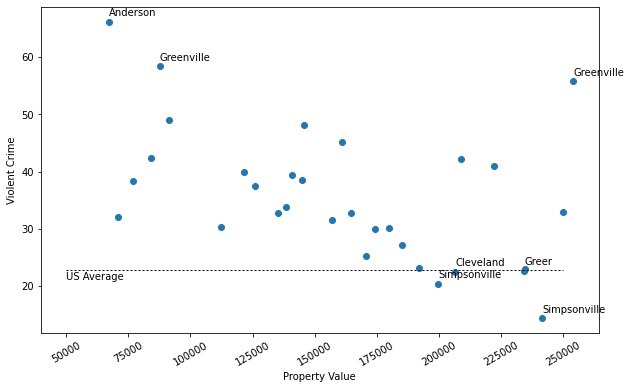

In [682]:
import matplotlib.pyplot as plt
import pandas as pd

df_SC_join4['list_property_value'] = df_SC_join4['list_property_value'].astype("int")
df_SC_join4['violentcrime'] = df_SC_join4['violentcrime'].astype("float")
df_SC_join4['propertycrime'] = df_SC_join4['propertycrime'].astype("float")
x = df_SC_join4['list_property_value']
y = df_SC_join4['violentcrime']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
plt.xlabel("Property Value")
plt.ylabel("Violent Crime")
plt.xticks(rotation=30)

#plt.plot([10, 10], [0, 80], 'k-', lw=1,dashes=[2, 2])
plt.plot([50000, 250000], [22.7, 22.7], 'k-', lw=1,dashes=[2, 2])
plt.annotate("US Average", (50000, 21))
annotations = df_SC_join4['Neighbourhood']
for i, label in enumerate(annotations):
    if y[i] < 22.7:
        plt.annotate(label, (x[i]+1, y[i]+1))
    if y[i] > 50:
        plt.annotate(label, (x[i]+1, y[i]+1))

plt.show()

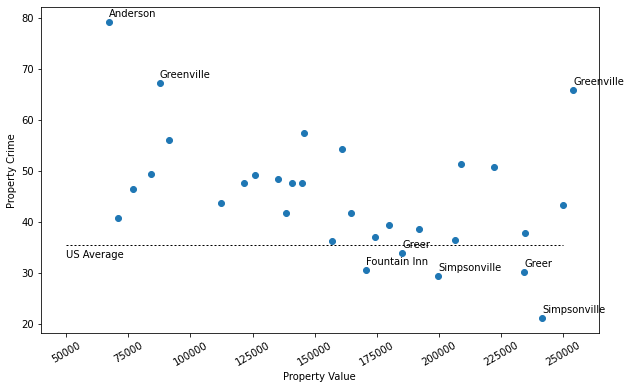

In [681]:
import matplotlib.pyplot as plt
import pandas as pd

df_SC_join4['list_property_value'] = df_SC_join4['list_property_value'].astype("int")
df_SC_join4['violentcrime'] = df_SC_join4['violentcrime'].astype("float")
df_SC_join4['propertycrime'] = df_SC_join4['propertycrime'].astype("float")

fig, ax = plt.subplots(figsize=(10, 6))
x = df_SC_join4['list_property_value']
y = df_SC_join4['propertycrime']
ax.scatter(x, y)
plt.xlabel("Property Value")
plt.ylabel("Property Crime")
plt.xticks(rotation=30)
plt.plot([50000, 250000], [35.4, 35.4], 'k-', lw=1,dashes=[2, 2])
plt.annotate("US Average", (50000, 33))
annotations = df_SC_join4['Neighbourhood']
for i, label in enumerate(annotations):
    if y[i] < 35.4:
        plt.annotate(label, (x[i]+1, y[i]+1))
        textcoords="offset points", # how to position the text
        xytext=(0,10)
        ha='center'
    if y[i] > 60:
        plt.annotate(label, (x[i]+1, y[i]+1))
        textcoords="offset points", # how to position the text
        xytext=(0,10)
        ha='center'


plt.show()

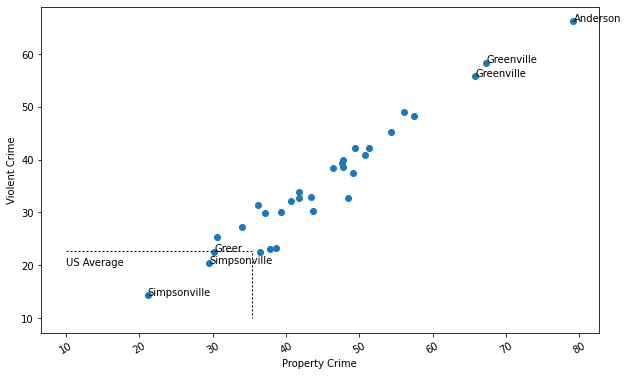

In [688]:
import matplotlib.pyplot as plt
import pandas as pd

df_SC_join4['list_property_value'] = df_SC_join4['list_property_value'].astype("int")
df_SC_join4['violentcrime'] = df_SC_join4['violentcrime'].astype("float")
df_SC_join4['propertycrime'] = df_SC_join4['propertycrime'].astype("float")
x = df_SC_join4['propertycrime']
y = df_SC_join4['violentcrime']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
plt.xlabel("Property Crime")
plt.ylabel("Violent Crime")
plt.xticks(rotation=30)

#plt.plot([10, 10], [0, 80], 'k-', lw=1,dashes=[2, 2])
plt.plot([10, 35.4, 35.4], [22.7, 22.7, 10], 'k-', lw=1,dashes=[2, 2])
plt.annotate("US Average", (10, 20))
annotations = df_SC_join4['Neighbourhood']
for i, label in enumerate(annotations):
    if y[i] < 22.7:
        if x[i] < 35.4:
            plt.annotate(label, (x[i], y[i]))
    if x[i] > 60:
            plt.annotate(label, (x[i], y[i]))    

plt.show()

##### This concludes the week 5 assignment. 